<a href="https://colab.research.google.com/github/Imran1hp/Food-Recognition-Deep-Learning-model/blob/main/Food_recognition_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import requests
import zipfile
from pathlib import Path
import torch


#making the data folder
folder_name = 'pizza_stack_shushi'

data_path = Path("data/")
image_path = data_path / folder_name

if image_path.is_dir():
  print("File already exist skipping download......")

else:
  print(f'{image_path} downloading ......... ')
  image_path.mkdir(parents = True , exist_ok = True )


  #Downloading Data
  with open(data_path / "pizza_stack_shushi.zip" , 'wb') as f:
    url = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/af6548e52663c8395fe2777bd0fbfd6ac85fd6f8/data/pizza_steak_sushi.zip')
    print("Downloading the data............." )
    f.write(url.content)

  #Unzip t he file
  with zipfile.ZipFile( data_path / "pizza_stack_shushi.zip" , 'r' ) as zip_ref:
    print('Unziping the data ')
    zip_ref.extractall(image_path)




File already exist skipping download......


In [3]:
import os



def walk_through_data(dir_path):
  for dirpath , dirnames , filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath} ")

In [4]:
image_path

PosixPath('data/pizza_stack_shushi')

In [5]:
walk_through_data(image_path)

There are 2 directories and 0 images in data/pizza_stack_shushi 
There are 3 directories and 0 images in data/pizza_stack_shushi/train 
There are 0 directories and 75 images in data/pizza_stack_shushi/train/steak 
There are 0 directories and 72 images in data/pizza_stack_shushi/train/sushi 
There are 0 directories and 78 images in data/pizza_stack_shushi/train/pizza 
There are 3 directories and 0 images in data/pizza_stack_shushi/test 
There are 0 directories and 19 images in data/pizza_stack_shushi/test/steak 
There are 0 directories and 31 images in data/pizza_stack_shushi/test/sushi 
There are 0 directories and 25 images in data/pizza_stack_shushi/test/pizza 


In [6]:

train_dir = image_path/ 'train'
test_dir =  image_path / 'test'
train_dir , test_dir


(PosixPath('data/pizza_stack_shushi/train'),
 PosixPath('data/pizza_stack_shushi/test'))

Image path data/pizza_stack_shushi/train/pizza/764429.jpg
Image Class: pizza
Image Height: 341
Image Width: 512


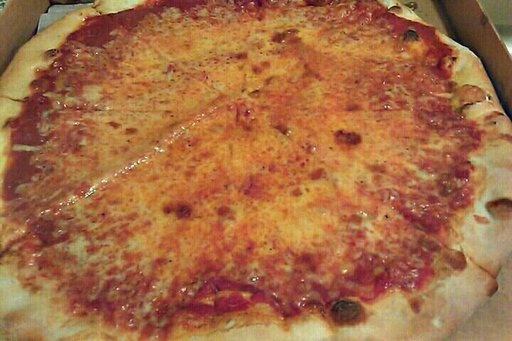

In [7]:
import random
from PIL import Image




img_path_list = list(image_path.glob('*/*/*.jpg'))

random_img_path = random.choice(img_path_list)

img_class = random_img_path.parent.stem

img = Image.open(random_img_path)
print(f"Image path {random_img_path}")
print(f"Image Class: {img_class}")
print(f"Image Height: {img.height}")
print(f"Image Width: {img.width}")

img


In [8]:
img_path_list

[PosixPath('data/pizza_stack_shushi/train/steak/1598345.jpg'),
 PosixPath('data/pizza_stack_shushi/train/steak/1413972.jpg'),
 PosixPath('data/pizza_stack_shushi/train/steak/2603058.jpg'),
 PosixPath('data/pizza_stack_shushi/train/steak/2129685.jpg'),
 PosixPath('data/pizza_stack_shushi/train/steak/2979061.jpg'),
 PosixPath('data/pizza_stack_shushi/train/steak/937133.jpg'),
 PosixPath('data/pizza_stack_shushi/train/steak/3074367.jpg'),
 PosixPath('data/pizza_stack_shushi/train/steak/443210.jpg'),
 PosixPath('data/pizza_stack_shushi/train/steak/735441.jpg'),
 PosixPath('data/pizza_stack_shushi/train/steak/1615395.jpg'),
 PosixPath('data/pizza_stack_shushi/train/steak/1839481.jpg'),
 PosixPath('data/pizza_stack_shushi/train/steak/97656.jpg'),
 PosixPath('data/pizza_stack_shushi/train/steak/1961025.jpg'),
 PosixPath('data/pizza_stack_shushi/train/steak/256592.jpg'),
 PosixPath('data/pizza_stack_shushi/train/steak/214320.jpg'),
 PosixPath('data/pizza_stack_shushi/train/steak/922752.jpg'),


(np.float64(-0.5), np.float64(511.5), np.float64(340.5), np.float64(-0.5))

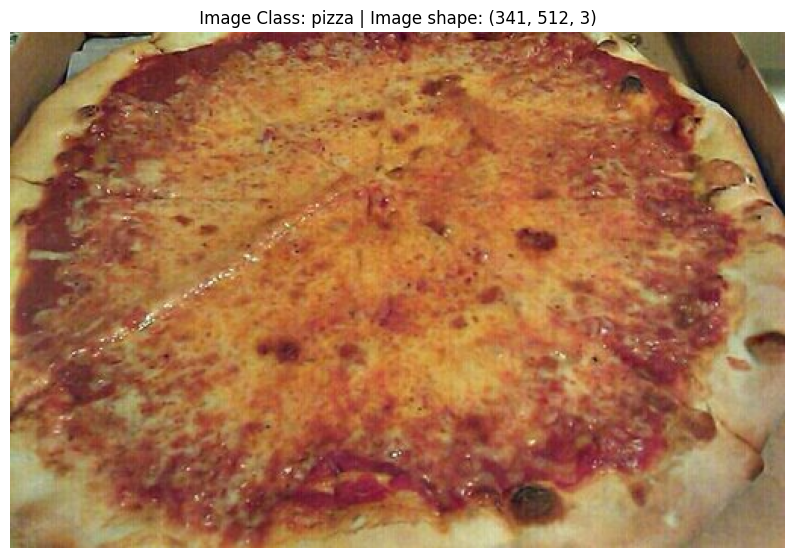

In [9]:
import numpy as np
import matplotlib.pyplot as plt

img_array = np.array(img)

plt.figure(figsize = ((10 ,7)))

plt.imshow(img_array)

plt.title(f" Image Class: {img_class} | Image shape: {img_array.shape} ")
plt.axis(False)

array([[[ 82,  89,  73],
        [ 57,  66,  47],
        [ 93, 105,  83],
        ...,
        [113, 107,  75],
        [116, 105,  77],
        [123, 112,  84]],

       [[ 99, 108,  91],
        [ 99, 111,  91],
        [123, 137, 114],
        ...,
        [120, 111,  80],
        [121, 110,  82],
        [127, 116,  88]],

       [[188, 203, 184],
        [168, 183, 162],
        [132, 150, 126],
        ...,
        [122, 113,  82],
        [122, 111,  81],
        [125, 114,  84]],

       ...,

       [[128, 131,  78],
        [131, 131,  79],
        [128, 122,  70],
        ...,
        [177, 144, 103],
        [180, 145, 107],
        [183, 147, 111]],

       [[130, 133,  80],
        [134, 134,  82],
        [130, 124,  72],
        ...,
        [176, 142, 104],
        [180, 144, 108],
        [183, 147, 111]],

       [[132, 135,  82],
        [138, 138,  86],
        [135, 129,  77],
        ...,
        [175, 141, 103],
        [180, 144, 108],
        [183, 147, 113]]], dtype=uint8)
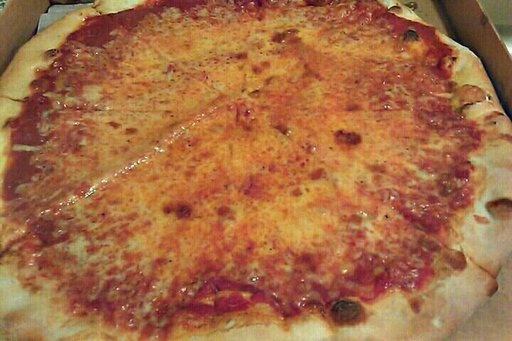

In [10]:
img_array

FOR UNDERSTANDING THE PIEXL DISTRIBUTION  OF 5 x 5

In [11]:
img_2_array = np.array([
 [(255, 0, 0),   (255, 0, 0),   (0, 0, 0),     (0, 0, 0),     (0, 0, 0)],
 [(255, 0, 0),   (255, 0, 0),   (0, 255, 0),   (0, 255, 0),   (0, 0, 0)],
 [(0, 0, 0),     (0, 255, 0),   (0, 0, 255),   (0, 255, 0),   (0, 0, 0)],
 [(0, 0, 0),     (0, 255, 0),   (0, 255, 0),   (255, 0, 0),   (255, 0, 0)],
])

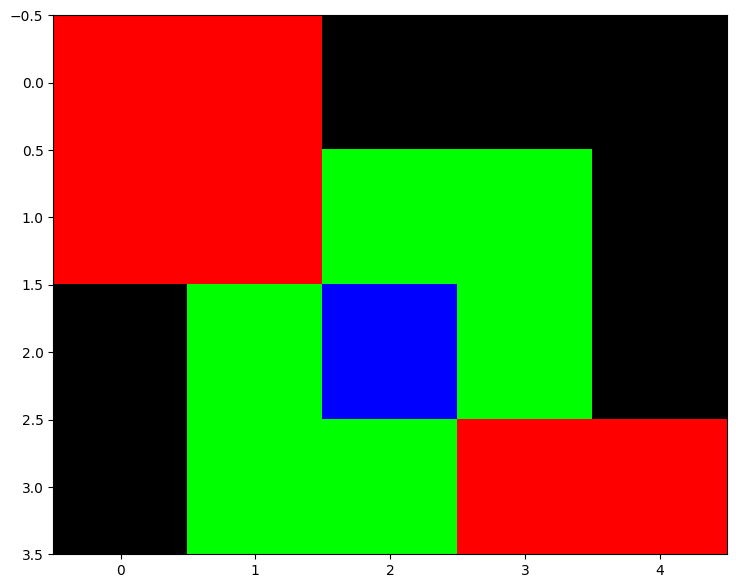

In [12]:
plt.figure (figsize =(10,7))

plt.imshow(img_2_array)

In [13]:
img_2_array.shape # --> heigth , width , color channel

(4, 5, 3)

In [14]:
print(f"Height: {len(img_2_array) } | Width: {len(img_2_array[0])} | Color channel : {len(img_2_array[0][0])}")

Height: 4 | Width: 5 | Color channel : 3


## Transforming Our Data into Tensor

In [15]:
from torch.utils.data import DataLoader
from torchvision import transforms , datasets
from torch import nn

data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(size=(64 , 64 )),
    transforms.RandomHorizontalFlip(p=0.5)
])

In [16]:
image = data_transform(img)
image.shape

torch.Size([3, 64, 64])

(np.float64(-0.5), np.float64(63.5), np.float64(63.5), np.float64(-0.5))

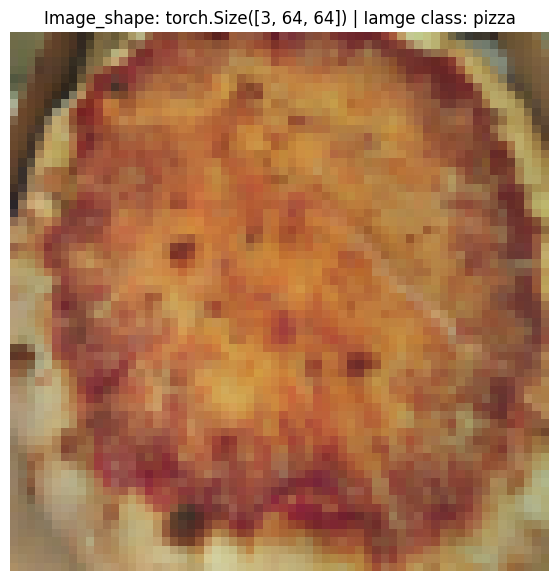

In [17]:
plt.figure(figsize =(10,7))

# Permute the dimensions of the tensor from (C, H, W) to (H, W, C) for imshow

plt.imshow(image.permute(1, 2, 0).numpy())
plt.title(f"Image_shape: {image.shape} | Iamge class: {img_class}")
plt.axis(False)

##Loading Image Data using image folder

In [18]:
train_dir , test_dir

(PosixPath('data/pizza_stack_shushi/train'),
 PosixPath('data/pizza_stack_shushi/test'))

In [19]:
from torchvision.datasets import ImageFolder
train_data = ImageFolder( root = train_dir , transform = data_transform , target_transform = None)
test_data  =  ImageFolder( root = test_dir , transform = data_transform , target_transform = None )

In [56]:
class_names = train_data.classes
class_names


['pizza', 'steak', 'sushi']

In [57]:
class_names_dict = train_data.class_to_idx
class_names_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [58]:
len(train_data), len(test_data)

(225, 75)

In [31]:
train_data.samples[200]

('data/pizza_stack_shushi/train/sushi/3353428.jpg', 2)

(np.float64(-0.5), np.float64(63.5), np.float64(63.5), np.float64(-0.5))

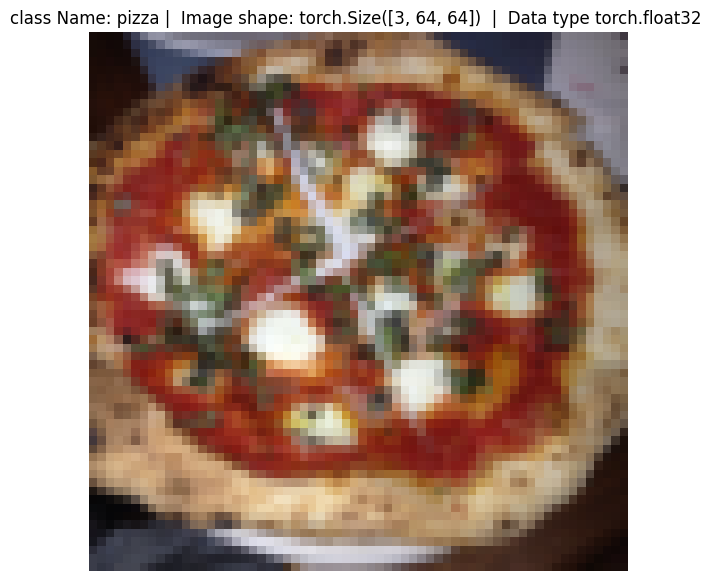

In [86]:
import random
#random.seed(42)
random_train_img = random.choice(train_data)
# ImageFolder return a tuple which 1st element is the image tensor and second element is the class name
image_tensor = random_train_img[0]
class_name = random_train_img[1]

plt.figure(figsize = (10,7))
plt.imshow(image_tensor.permute(1,2,0).numpy())
plt.title(f"class Name: {class_names[class_name]}  |  Image shape: {image_tensor.shape}  |  Data type { image_tensor.dtype} ")
plt.axis(False)

## Creating a train and test DataLoader

In [94]:
from torch.utils.data import DataLoader


BATCH_SIZE = 32
train_dataloader = DataLoader( dataset = train_data , batch_size = BATCH_SIZE , shuffle = True)
test_dataloader = DataLoader ( dataset = test_data , batch_size = BATCH_SIZE , shuffle = False )


train_dataloader , test_dataloader


(<torch.utils.data.dataloader.DataLoader at 0x7fe3e31d84a0>,
 <torch.utils.data.dataloader.DataLoader at 0x7fe3e35a0740>)

In [100]:
print(f"Train dataloader length is {len(train_dataloader)} with each batch size  {BATCH_SIZE}")
print(f"Test dataloader lenght is {len(test_dataloader)} with each bactch size  {BATCH_SIZE}" )

Train dataloader length is 8 with each batch size  32
Test dataloader lenght is 3 with each bactch size  32


In [101]:
(225 /32) ,(75/32)

(7.03125, 2.34375)

In [102]:
train_feature_batch , train_label_batch = next(iter(train_dataloader))
test_feature_batch , test_label_batch = next(iter(test_dataloader))

In [103]:
train_feature_batch.shape , train_label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [106]:
train_feature_batch[31], train_label_batch[31]

(tensor([[[0.0479, 0.0480, 0.0480,  ..., 0.0387, 0.0395, 0.0399],
          [0.1040, 0.1097, 0.1154,  ..., 0.0535, 0.0547, 0.0552],
          [0.1200, 0.1243, 0.1268,  ..., 0.0505, 0.0521, 0.0509],
          ...,
          [0.1411, 0.1408, 0.1395,  ..., 0.1396, 0.1414, 0.1413],
          [0.1436, 0.1424, 0.1399,  ..., 0.1414, 0.1428, 0.1451],
          [0.4069, 0.4068, 0.4048,  ..., 0.4047, 0.4072, 0.4076]],
 
         [[0.0520, 0.0522, 0.0526,  ..., 0.0476, 0.0474, 0.0476],
          [0.0874, 0.0928, 0.0954,  ..., 0.0532, 0.0505, 0.0504],
          [0.0914, 0.0975, 0.0996,  ..., 0.0530, 0.0519, 0.0498],
          ...,
          [0.1454, 0.1450, 0.1438,  ..., 0.1439, 0.1457, 0.1456],
          [0.1481, 0.1469, 0.1444,  ..., 0.1459, 0.1474, 0.1496],
          [0.4109, 0.4107, 0.4088,  ..., 0.4087, 0.4111, 0.4115]],
 
         [[0.1046, 0.1048, 0.1052,  ..., 0.1055, 0.1056, 0.1058],
          [0.1248, 0.1292, 0.1323,  ..., 0.1086, 0.1068, 0.1068],
          [0.1312, 0.1294, 0.1287,  ...,

In [107]:
len(train_feature_batch) , len(test_feature_batch)

(32, 32)

(np.float64(-0.5), np.float64(63.5), np.float64(63.5), np.float64(-0.5))

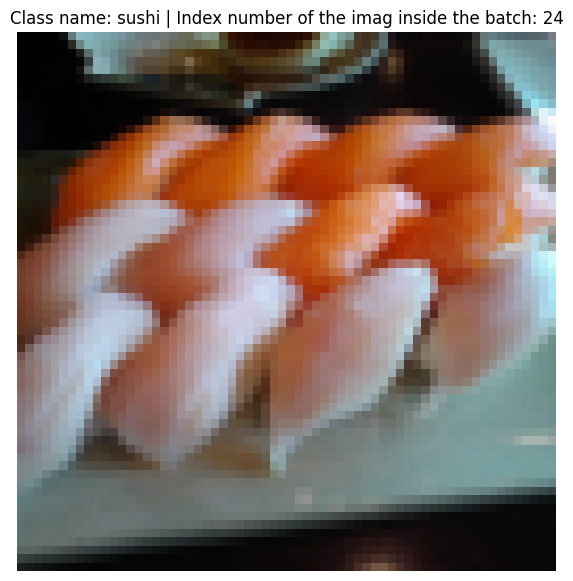

In [117]:
import random
import torch

random_idx = torch.randint( 0 , len(train_feature_batch), size = [1]).item()
img , label = train_feature_batch[random_idx] , train_label_batch[random_idx]


plt.figure(figsize =(10,7))
plt.imshow(img.permute(1,2,0).numpy())
plt.title(f"Class name: {class_names[label]} | Index number of the imag inside the batch: {random_idx}")
plt.axis(False)